In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

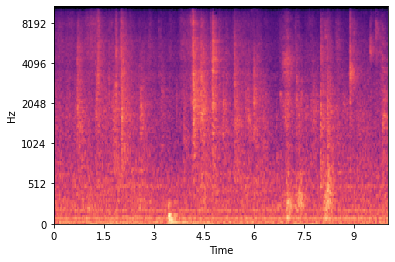

In [19]:
filepath1 = '/content/drive/MyDrive/Situation_Classification_From_Sounds/dataset/Classroom/classroom/classroom-001.mp3'
filepath2 = '/content/drive/MyDrive/Situation_Classification_From_Sounds/dataset/Cabaret/cabaret/cabaret01-001.mp3'
filepath3 = '/content/drive/MyDrive/Situation_Classification_From_Sounds/dataset/Large_public_room/large_public_room/large_public_room-001.mp3'
f, sr = librosa.load(filepath1)
f2, sr2 = librosa.load(filepath2)
f3, sr3 = librosa.load(filepath3)
st = librosa.stft(f)
st2 = librosa.stft(f2)
st3 = librosa.stft(f3)

mel_spectrogram = librosa.feature.melspectrogram(f, sr)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
librosa.display.specshow(log_mel_spectrogram, x_axis="time", y_axis="mel", sr=sr)

# spectogram = np.abs(st)
# plt.imshow(log_mel_spectrogram)
Audio(filepath1)

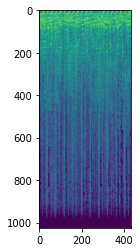

In [ ]:
spectogram2 = np.abs(st2)
plt.imshow(librosa.amplitude_to_db(spectogram2))
Audio(filepath2)

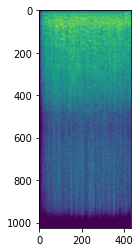

In [ ]:
spectogram3 = np.abs(st3)
plt.imshow(librosa.amplitude_to_db(spectogram3))
Audio(filepath3)

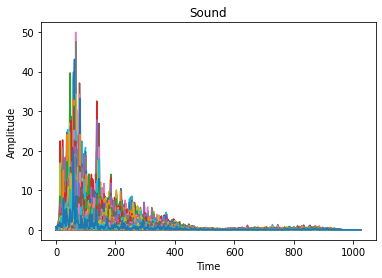

In [ ]:
plt.plot(spectogram3);

plt.title('Sound');

plt.xlabel('Time');

plt.ylabel('Amplitude');

In [ ]:
spectogram.shape

(1025, 432)

In [ ]:
def spect(wave):
    f, sr = librosa.load("/content/drive/MyDrive/Situation_Classification_From_Sounds/dataset/"+ wave, duration = 9)
    st = librosa.stft(f)
    spectogram = np.abs(st)
    return spectogram

In [ ]:
x = list()
y = list()
Ca_files = os.listdir('/content/drive/MyDrive/Situation_Classification_From_Sounds/dataset/Cabaret/cabaret/')
Classr_files = os.listdir('/content/drive/MyDrive/Situation_Classification_From_Sounds/dataset/Classroom/classroom/')
Public_file = os.listdir('/content/drive/MyDrive/Situation_Classification_From_Sounds/dataset/Large_public_room/large_public_room/')

for l in tqdm(Classr_files):
  file1 = "Classroom/classroom/"+ l
  data = spect(file1) #อ่านข้อมูลเสียงทีละไฟล์
  x.append(data)  # อัดเข้าตัวแปร x    
  y.append([1,0,0]) #กำหนด label 1,0 คือ Classroom เข้าตัวแปร y

for l in tqdm(Ca_files):
  file1 = "Cabaret/cabaret/"+ l
  data = spect(file1) 
  x.append(data)
  y.append([0,1,0]) 

for l in tqdm(Public_file):
  file1 = "Large_public_room/large_public_room/"+ l
  data = spect(file1)
  x.append(data)      
  y.append([0,0,1])

100%|██████████| 243/243 [04:31<00:00,  1.12s/it]


In [ ]:
X = np.array(x)
y = np.array(y)
X.shape, y.shape

((857, 1025, 388), (857, 3))

In [ ]:
from sklearn.model_selection import train_test_split
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
xtrain, xtest, ytrain, ytest = train_test_split(X,y, train_size = 0.75, random_state=42)

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((642, 1025, 388, 1), (215, 1025, 388, 1), (642, 3), (215, 3))

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout

In [ ]:
xtrain.shape[1:]

(1025, 388, 1)

In [ ]:
model = keras.Sequential([
  keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=xtrain.shape[1:]),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),

  keras.layers.Conv2D(128,(3,3) , activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),

  keras.layers.Dense(64),
  keras.layers.Dense(16),
  keras.layers.Flatten(),
 
  keras.layers.Dense(3),
  keras.layers.Activation('softmax')
])
  
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics= ['accuracy'])
batch_size = 16
epochs = 30

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1023, 386, 128)    1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 511, 193, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 509, 191, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 254, 95, 128)     0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 254, 95, 64)       8256      
                                                                 
 dense_1 (Dense)             (None, 254, 95, 16)       1

In [ ]:
history = model.fit(xtrain, ytrain, batch_size = batch_size ,epochs=epochs, validation_data=(xtest, ytest))

los: 0.0
val_loss: 2.0348484497390018e-07


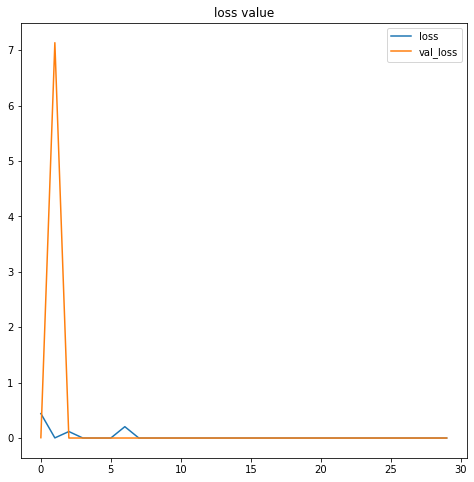

acc: 1.0
val_acc: 1.0


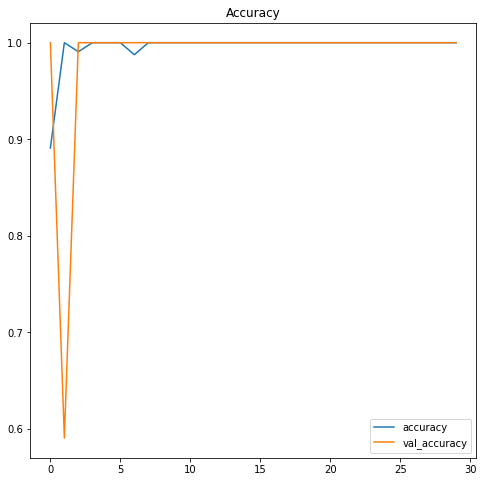

In [ ]:
plt.figure(figsize=(8,8))
plt.title('loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
print('los:', history.history['loss'][-1])
print('val_loss:', history.history['val_loss'][-1])
plt.show()
plt.figure(figsize=(8,8))
plt.title('Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
print('acc:', history.history['accuracy'][-1])
print('val_acc:', history.history['val_accuracy'][-1])
plt.show()

In [ ]:
def wav2predict(sf): 
  data = spect(sf)
  data2arr = np.array(data) 
  testsound = data2arr.reshape(1, data2arr.shape[0], data2arr.shape[1], 1) 
  p = model.predict(testsound) 
  label = ['Classroom','Cabaret','Public'] 
  i = np.argmax(p) 
  prop = np.max(p) 
  result = label[i] 
  return result , prop 

In [ ]:
sound = 'test/cabarettest01.mp3'
r = wav2predict(sound)
print(r)
Audio('/content/drive/MyDrive/Situation_Classification_From_Sounds/dataset/test/cabarettest01.mp3')

1/1 [==============================] - 0s 33ms/step
('Cabaret', 0.99999595)


In [ ]:
test_file = os.listdir('/content/drive/MyDrive/Situation_Classification_From_Sounds/dataset/test')
for t in tqdm(test_file):
  sound = "test/" + t
  r = wav2predict(sound)
  print("\n")
  print("----------------------------")
  print(f"name file : {t}")
  print(r)
  print("----------------------------")